# Notes for use palettes in python

In [1]:
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle
import matplotlib.colors
import seaborn as sns
import numpy as np
import colorsys

- Method for display a color

In [2]:
def show_color(color=(0.5,0.5,0.5)):
    fig,ax = plt.subplots(figsize=(0.5,0.2))
    _ = ax.add_patch(Rectangle((0, 0), 0.4,0.2,color=color))
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    _ = ax.set_xlim([0,0.4])
    _ = ax.set_ylim([0,0.2])

- Convert hex value to rgb value in [0,255]

In [3]:
def hex2rgb(h):
    if h.startswith("#"):
        h = h[1:]
    r,g,b = int(h[0:2],16),int(h[2:4],16),int(h[4:6],16)
    return r,g,b

In [4]:
show_color(color=(0.2, 0.4, 0.4))

### Convert between `rgb` and `hsv`

In [5]:
colorsys.rgb_to_hsv(0.2, 0.4, 0.4)

(0.5, 0.5, 0.4)

In [6]:
colorsys.hsv_to_rgb(0.5, 0.5, 0.4)

(0.2, 0.4, 0.4)

## Sequential color maps in python

In [7]:
sns.__version__
## Seems flare and crest are not presented in this version 

'0.10.0'

- `sns.color_palette` return list of rgb colors

In [8]:
sns.color_palette("magma",n_colors=5)

[(0.171713, 0.067305, 0.370771),
 (0.445163, 0.122724, 0.506901),
 (0.716387, 0.214982, 0.47529),
 (0.944006, 0.377643, 0.365136),
 (0.997077, 0.690088, 0.471811)]

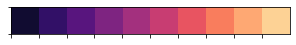

In [9]:
sns.palplot(sns.color_palette("magma",n_colors=10),size=0.5)

- `cm.coolwarm` is a `matplotlib.colors.LinearColormap`, that store an array of colors
- Individual color can be accessed by `cm.magma.colors[idx]`

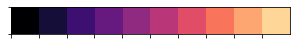

In [10]:
idx = np.arange(0,len(cm.magma.colors),26)
sns.palplot(np.array(cm.magma.colors)[idx],size=0.5)

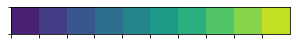

In [11]:
sns.palplot(sns.color_palette("viridis",n_colors=10),size=0.5)

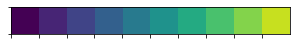

In [12]:
idx = np.arange(0,len(cm.viridis.colors),26)
sns.palplot(np.array(cm.viridis.colors)[idx],size=0.5)

- Append an '_r' allows reverse the color map

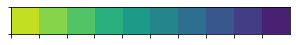

In [13]:
sns.palplot(sns.color_palette("viridis_r",n_colors=10),size=0.5)

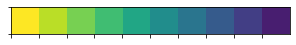

In [14]:
idx = np.arange(0,len(cm.viridis_r.colors),26)
sns.palplot(np.array(cm.viridis_r.colors)[idx],size=0.5)

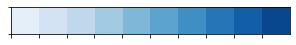

In [15]:
sns.palplot(sns.color_palette("Blues",n_colors=10),size=0.5)

- `cm.Blues` is a `matplotlib.colors.LinearSegmentedColormap`, that map a continous value to a color
- Individual color can be accessed by function call

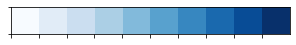

In [16]:
sns.palplot(cm.Blues(np.linspace(0,1,10)),size=0.5)

## Diverging color maps in python

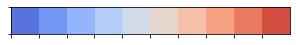

In [17]:
sns.palplot(sns.color_palette("coolwarm",n_colors=10),size=0.5)

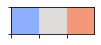

In [18]:
sns.palplot(sns.color_palette("coolwarm",n_colors=3),size=0.5)

In [19]:
type(cm.coolwarm)

matplotlib.colors.LinearSegmentedColormap

- `cm.coolwarm` is a `matplotlib.colors.LinearSegmentedColormap`

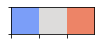

In [20]:
sns.palplot(cm.coolwarm(np.linspace(0.2,0.8,3)),size=0.5)

### Customized color maps
- Continous color map
- Discrete color map

In [21]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["blue","grey","red"])

In [22]:
cmap = matplotlib.colors.ListedColormap(["blue","grey","red"])

In [23]:
x = np.random.randn(200)
y = np.random.randn(200)

### Using cmap in matplotlib

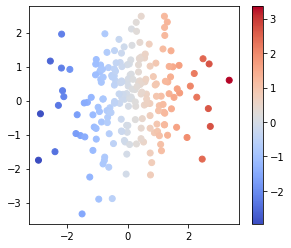

In [24]:
fig,ax = plt.subplots(figsize=(4.7,4))
im = ax.scatter(x,y,c=x,cmap=cm.coolwarm)
fig.colorbar(im, ax=ax)

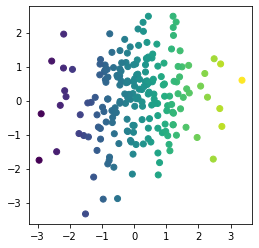

In [25]:
fig,ax = plt.subplots(figsize=(4,4))
ax.scatter(x,y,c=x,cmap=cm.viridis)

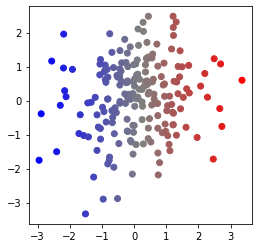

In [26]:
fig,ax = plt.subplots(figsize=(4,4))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["blue","grey","red"])
ax.scatter(x,y,c=x,cmap=cmap)

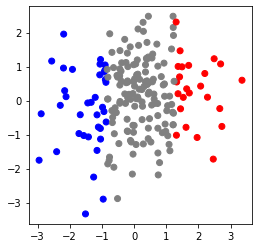

In [27]:
fig,ax = plt.subplots(figsize=(4,4))
cmap = matplotlib.colors.ListedColormap(["blue","grey","red"])
ax.scatter(x,y,c=x,cmap=cmap)

- For line plot, you have to manually get the list of colors, and plot each line ...
- Dirty, but works
- Also see <https://matplotlib.org/stable/gallery/lines_bars_and_markers/multicolored_line.html#sphx-glr-gallery-lines-bars-and-markers-multicolored-line-py> for more professional implementation

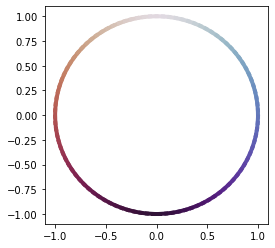

In [28]:
t = np.linspace(0,2*np.pi,100)
x = np.sin(t)
y = np.cos(t)
c = cm.twilight((t-t.min())/(t.max()-t.min()))
fig,ax = plt.subplots(figsize=(4,4))
for i in range(c.shape[0]-1):
    ax.plot(x[i:i+2],y[i:i+2],color=c[i],lw=4)

### Normalize the value to color mapping
- You may want to trim off some value for visualization ...

In [29]:
x = np.random.randn(200) + 5
y = np.random.randn(200)*x - 2

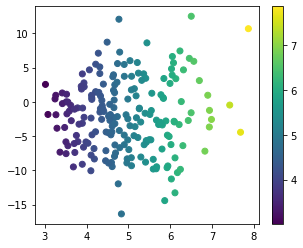

In [30]:
fig,ax = plt.subplots(figsize=(5,4))
im = ax.scatter(x,y,c=x,cmap=cm.viridis)
fig.colorbar(im, ax=ax)

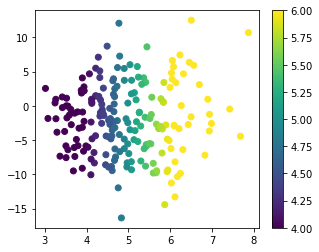

In [31]:
fig,ax = plt.subplots(figsize=(5,4))
im = ax.scatter(x,y,c=x,norm = plt.Normalize(4,6),cmap=cm.viridis)
fig.colorbar(im, ax=ax)

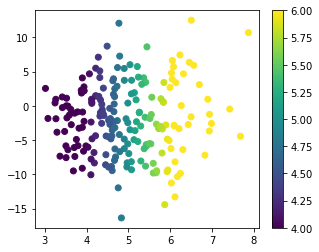

In [33]:
fig,ax = plt.subplots(figsize=(5,4))
sm = cm.ScalarMappable(cmap=cm.viridis,norm=plt.Normalize(4,6))
colors = sm.to_rgba(x)
im = ax.scatter(x,y,c=colors)
cb = fig.colorbar(sm,ax=ax)
#cb.set_ticks([4,4.5,5,5.5,6])

### Mapping between continous color map and discrete color map

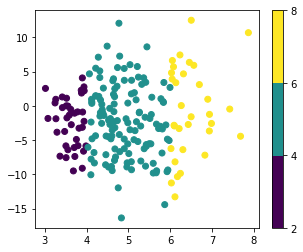

In [34]:
bounds = [2,4,6,8]
norm = matplotlib.colors.BoundaryNorm(bounds, cm.viridis.N)
fig,ax = plt.subplots(figsize=(5,4))
im = ax.scatter(x,y,c=x,norm = norm,cmap=cm.viridis)
fig.colorbar(im, ax=ax)

### Customize your color bar
- See <https://matplotlib.org/stable/tutorials/colors/colorbar_only.html>